In [1]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [2]:
import pandas as pd
df = pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


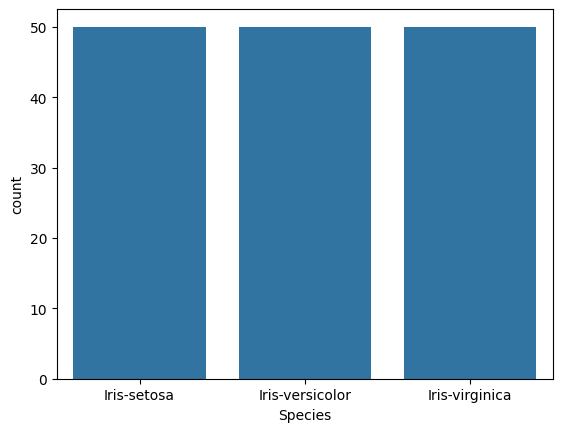

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='Species', data=df)
plt.show()

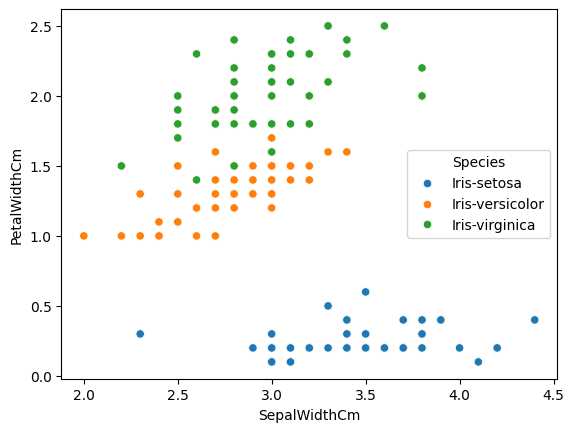

In [9]:
sns.scatterplot(x='SepalWidthCm', y='PetalWidthCm', hue='Species', data=df)
plt.show()

In [10]:
df1 = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']]
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
dataset = df1.values
X = dataset[:, :-1]
y = dataset[:, -1]

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[0]

array([0.22222222, 0.625     , 0.06779661, 0.04166667])

In [16]:
# 훈련, 테스트 데이터셋 구분하기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3,
                                                    stratify=y, random_state=0)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [19]:
print("훈련 데이터를 이용한 모델 분류 정확도 : ", knn.score(X_train, y_train))

훈련 데이터를 이용한 모델 분류 정확도 :  0.9619047619047619


In [20]:
print("테스트 데이터를 이용한 모델 성능 평가 : ", knn.score(X_test, y_test))

테스트 데이터를 이용한 모델 성능 평가 :  0.9777777777777777


In [21]:
for k in range(2, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    print('k: %2d, accuracy: %.2f' % (k, score*100))

k:  2, accuracy: 97.78
k:  3, accuracy: 97.78
k:  4, accuracy: 97.78
k:  5, accuracy: 97.78
k:  6, accuracy: 97.78
k:  7, accuracy: 97.78
k:  8, accuracy: 97.78
k:  9, accuracy: 97.78
k: 10, accuracy: 97.78


In [22]:
predictions = knn.predict(X_test)

In [23]:
print(predictions[:5])
print(y_test[:5])

['Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor']
['Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor']


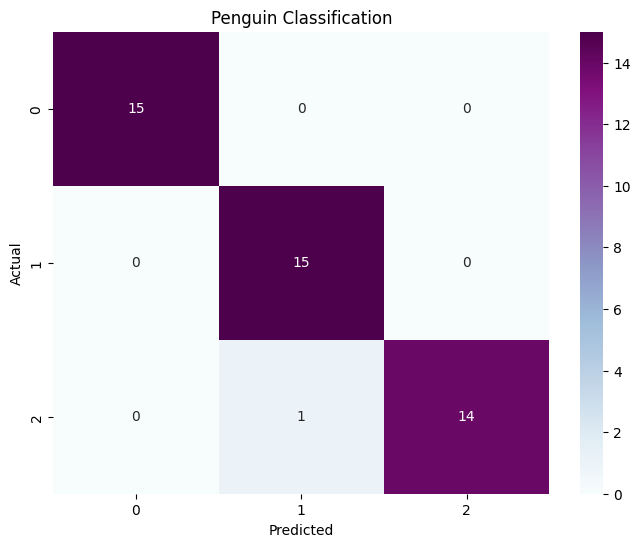

In [24]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8, 6))

conf = confusion_matrix(y_test, predictions)
sns.heatmap(conf, annot=True, cmap="BuPu")

plt.title("Penguin Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()